## Import Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Md Shah Alak\Downloads\heart_disease_uci (1).csv")

## DATA CLEANING

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.shape

(920, 16)

In [5]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
df.isnull().mean()*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
# Handle Missing Values
num_cols = ["trestbps","chol","thalch","oldpeak","ca"]

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [9]:
cat_cols = ["sex","cp","fbs","restecg","exang","slope","thal"]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\Md Shah Alak\AppData\Local\Temp\ipykernel_19836\927861276.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


## EXPLORATORY DATA ANALYSIS (EDA)

In [10]:
# Basic Statistics
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


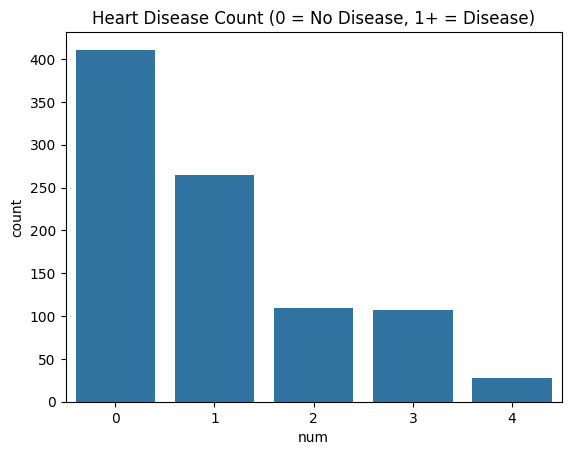

In [11]:
# Target Variable Distribution (num)
sns.countplot(x= df['num'])
plt.title('Heart Disease Count (0 = No Disease, 1+ = Disease)')
plt.show()

<Axes: xlabel='num', ylabel='age'>

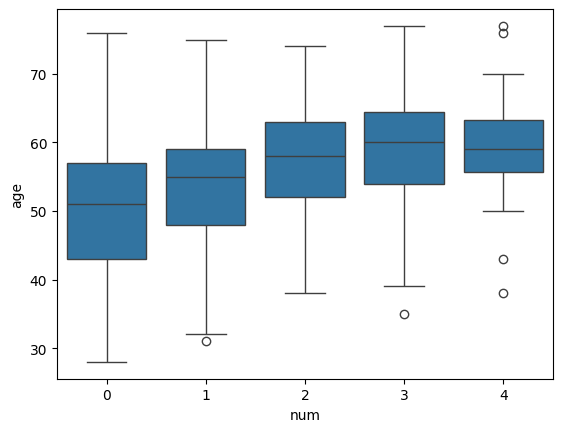

In [12]:
# Age vs Heart Disease
sns.boxplot(x='num',y='age', data=df)

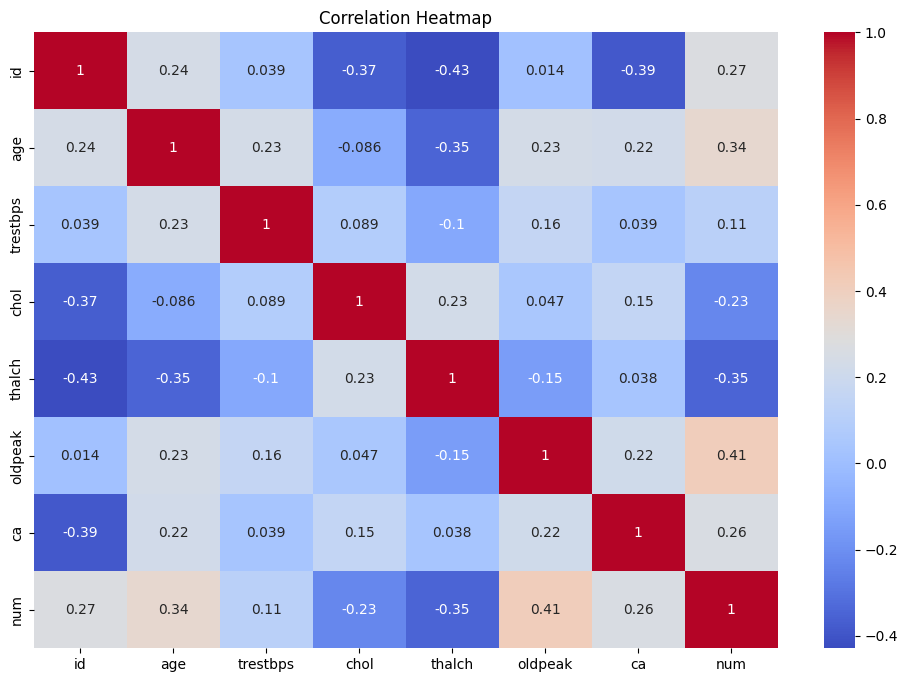

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

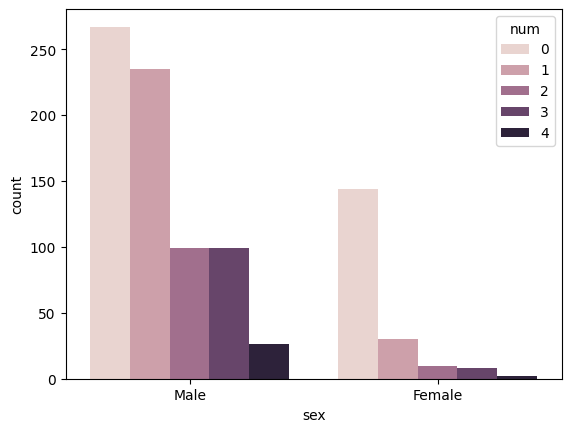

In [14]:
# Check gender impact
sns.countplot(x='sex', hue='num', data=df)

## FEATURE ENGINEERING

In [15]:
# Convert categorical to numeric using label encoding
df['sex'] = df['sex'].replace({'male':1, 'female':0})
df['fbs'] = df['fbs'].replace({'true':1, 'false':0})
df['exang'] = df['exang'].replace({'yes':1, 'no':0})

In [16]:
# Convert categorical to dummy variables
dff = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# dff = pd.get_dummies(dff, drop_first=True)

## MODEL BUILDING

In [17]:
dff = pd.get_dummies(dff, drop_first=True)

In [18]:
X = dff.drop("num", axis=1)
y = dff['num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
#  Train & Evaluate
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

C:\Users\Md Shah Alak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

## MODEL EVALUATION

Accuracy: 0.5163043478260869
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        75
           1       0.40      0.50      0.44        54
           2       0.00      0.00      0.00        25
           3       0.20      0.08      0.11        26
           4       0.00      0.00      0.00         4

    accuracy                           0.52       184
   macro avg       0.25      0.29      0.26       184
weighted avg       0.42      0.52      0.45       184



C:\Users\Md Shah Alak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Md Shah Alak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Md Shah Alak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

<Axes: >

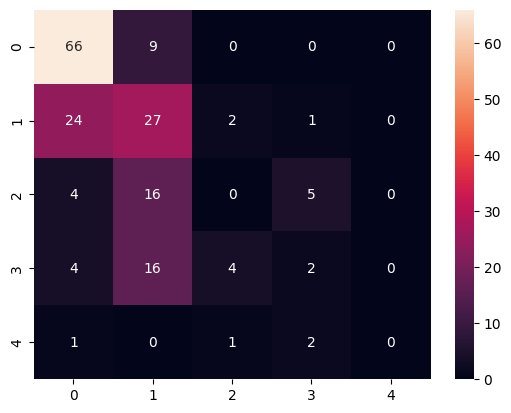

In [23]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')